In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from decimal import Decimal
from fractions import Fraction
import math
from scipy.optimize import fsolve

%matplotlib inline

In [26]:
data_dir = "/datassd/pipeline_cpp/client_tiled/output/nocull"

bwe = 80000
d2c_split = 1.0
d2c_ratio = (1, 1)

In [27]:
# list all files in the directory
files = os.listdir(data_dir)
files = [f for f in files if f.startswith(f"rmse_bwe{bwe}")]
print(files)

['rmse_bwe80000_cbwe27200_dbwe52800.txt', 'rmse_bwe80000_cbwe40000_dbwe40000.txt', 'rmse_bwe80000_cbwe16000_dbwe64000.txt', 'rmse_bwe80000_cbwe43200_dbwe36800.txt', 'rmse_bwe80000_cbwe46400_dbwe33600.txt', 'rmse_bwe80000_cbwe65600_dbwe14400.txt', 'rmse_bwe80000_cbwe24000_dbwe56000.txt', 'rmse_bwe80000_cbwe72000_dbwe8000.txt', 'rmse_bwe80000_cbwe60000_dbwe20000.txt', 'rmse_bwe80000_cbwe1600_dbwe78400.txt', 'rmse_bwe80000_cbwe3000_dbwe77000.txt', 'rmse_bwe80000_cbwe20800_dbwe59200.txt', 'rmse_bwe80000_cbwe59200_dbwe20800.txt', 'rmse_bwe80000_cbwe4800_dbwe75200.txt', 'rmse_bwe80000_cbwe49600_dbwe30400.txt', 'rmse_bwe80000_cbwe70000_dbwe10000.txt', 'rmse_bwe80000_cbwe52800_dbwe27200.txt', 'rmse_bwe80000_cbwe62400_dbwe17600.txt', 'rmse_bwe80000_cbwe33600_dbwe46400.txt', 'rmse_bwe80000_cbwe68800_dbwe11200.txt', 'rmse_bwe80000_cbwe5000_dbwe75000.txt', 'rmse_bwe80000_cbwe11429_dbwe68571.txt', 'rmse_bwe80000_cbwe26667_dbwe53333.txt', 'rmse_bwe80000_cbwe20000_dbwe60000.txt', 'rmse_bwe80000_cbwe1

In [28]:
data_dict = {}
d2c_splits = []

for file in files:
    file_name = os.path.splitext(file)[0]
    cbwe = int(file_name.split("_")[2].split("bwe")[1])
    dbwe = int(file_name.split("_")[3].split("bwe")[1])
    d2c_split = round(float(dbwe) / float(cbwe + dbwe), 2)

    print(f"cbwe: {cbwe}, dbwe: {dbwe}, d2c_split: {d2c_split}")
    d2c_split_str = str(d2c_split)
    data = pd.read_csv(os.path.join(data_dir, file))
    data_dict[d2c_split_str] = data

    d2c_splits.append(d2c_split)

d2c_splits = sorted(d2c_splits)
d2c_splits_str = [str(d2c_split) for d2c_split in d2c_splits]

cbwe: 27200, dbwe: 52800, d2c_split: 0.66
cbwe: 40000, dbwe: 40000, d2c_split: 0.5
cbwe: 16000, dbwe: 64000, d2c_split: 0.8
cbwe: 43200, dbwe: 36800, d2c_split: 0.46
cbwe: 46400, dbwe: 33600, d2c_split: 0.42
cbwe: 65600, dbwe: 14400, d2c_split: 0.18
cbwe: 24000, dbwe: 56000, d2c_split: 0.7
cbwe: 72000, dbwe: 8000, d2c_split: 0.1
cbwe: 60000, dbwe: 20000, d2c_split: 0.25
cbwe: 1600, dbwe: 78400, d2c_split: 0.98
cbwe: 3000, dbwe: 77000, d2c_split: 0.96
cbwe: 20800, dbwe: 59200, d2c_split: 0.74
cbwe: 59200, dbwe: 20800, d2c_split: 0.26
cbwe: 4800, dbwe: 75200, d2c_split: 0.94
cbwe: 49600, dbwe: 30400, d2c_split: 0.38
cbwe: 70000, dbwe: 10000, d2c_split: 0.12
cbwe: 52800, dbwe: 27200, d2c_split: 0.34
cbwe: 62400, dbwe: 17600, d2c_split: 0.22
cbwe: 33600, dbwe: 46400, d2c_split: 0.58
cbwe: 68800, dbwe: 11200, d2c_split: 0.14
cbwe: 5000, dbwe: 75000, d2c_split: 0.94
cbwe: 11429, dbwe: 68571, d2c_split: 0.86
cbwe: 26667, dbwe: 53333, d2c_split: 0.67
cbwe: 20000, dbwe: 60000, d2c_split: 0.75
c

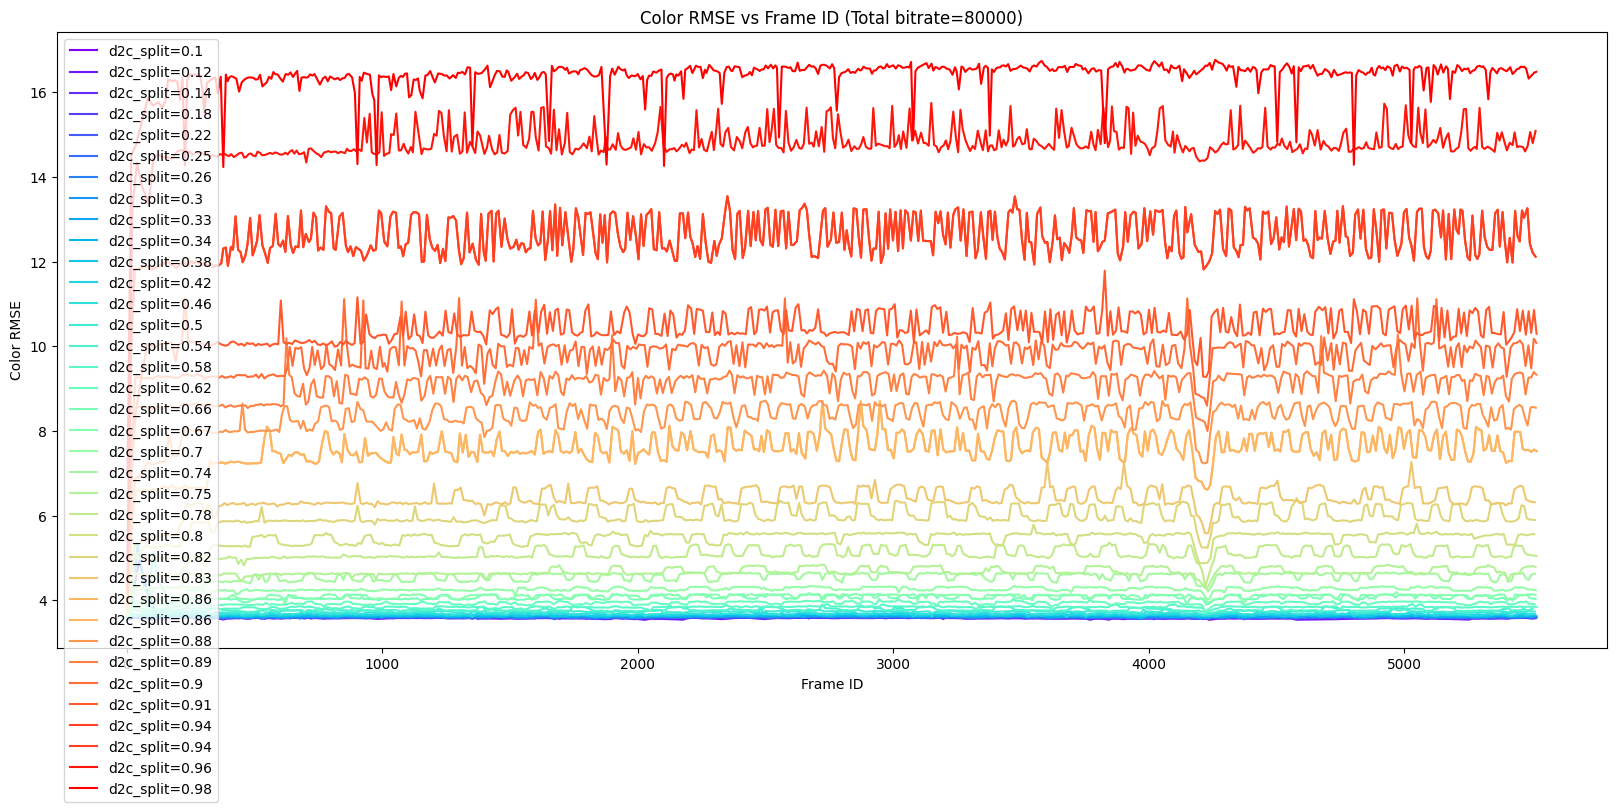

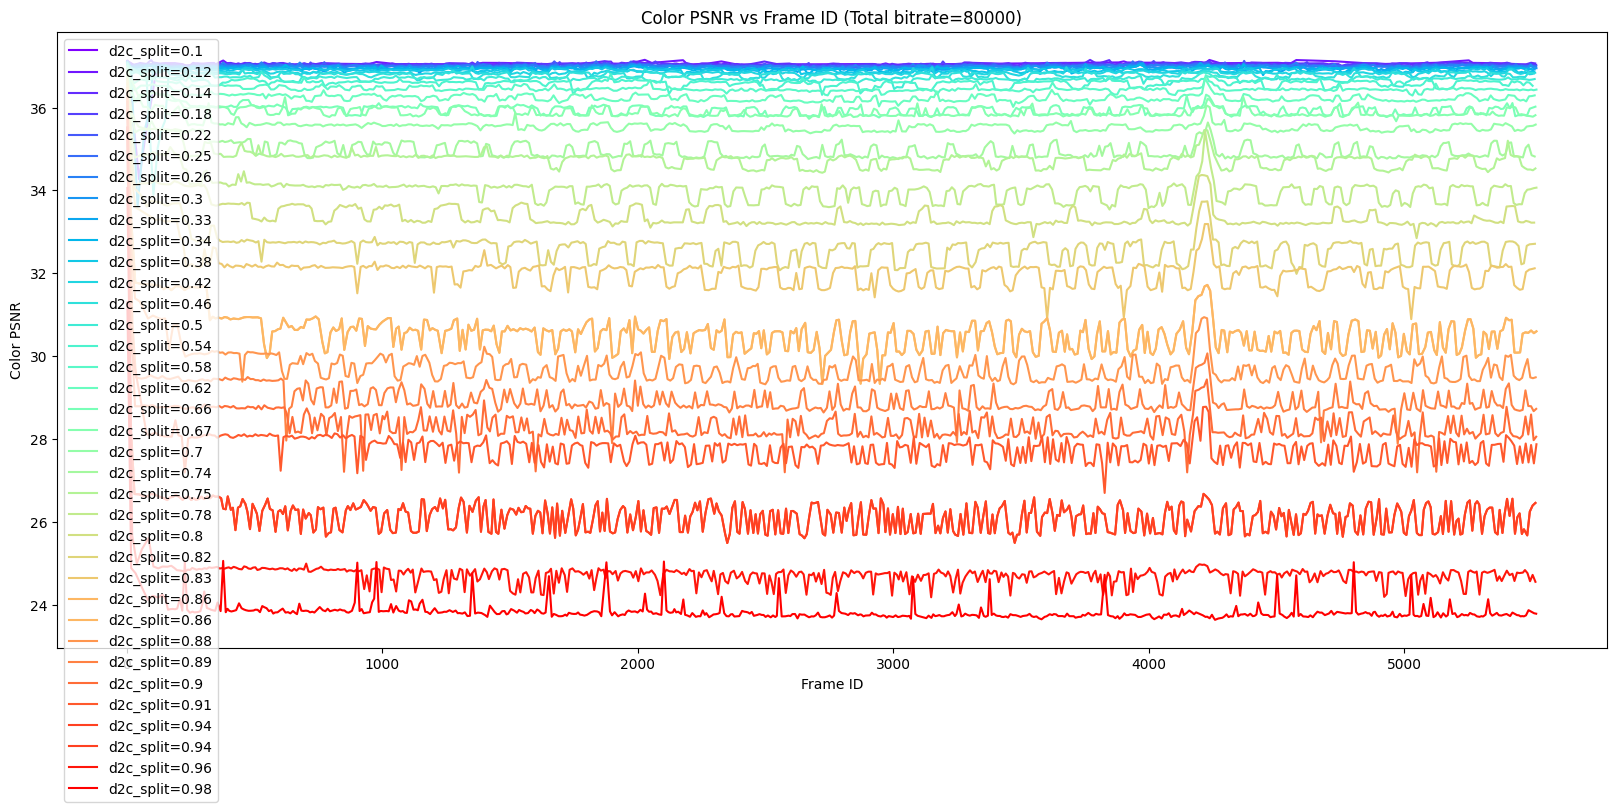

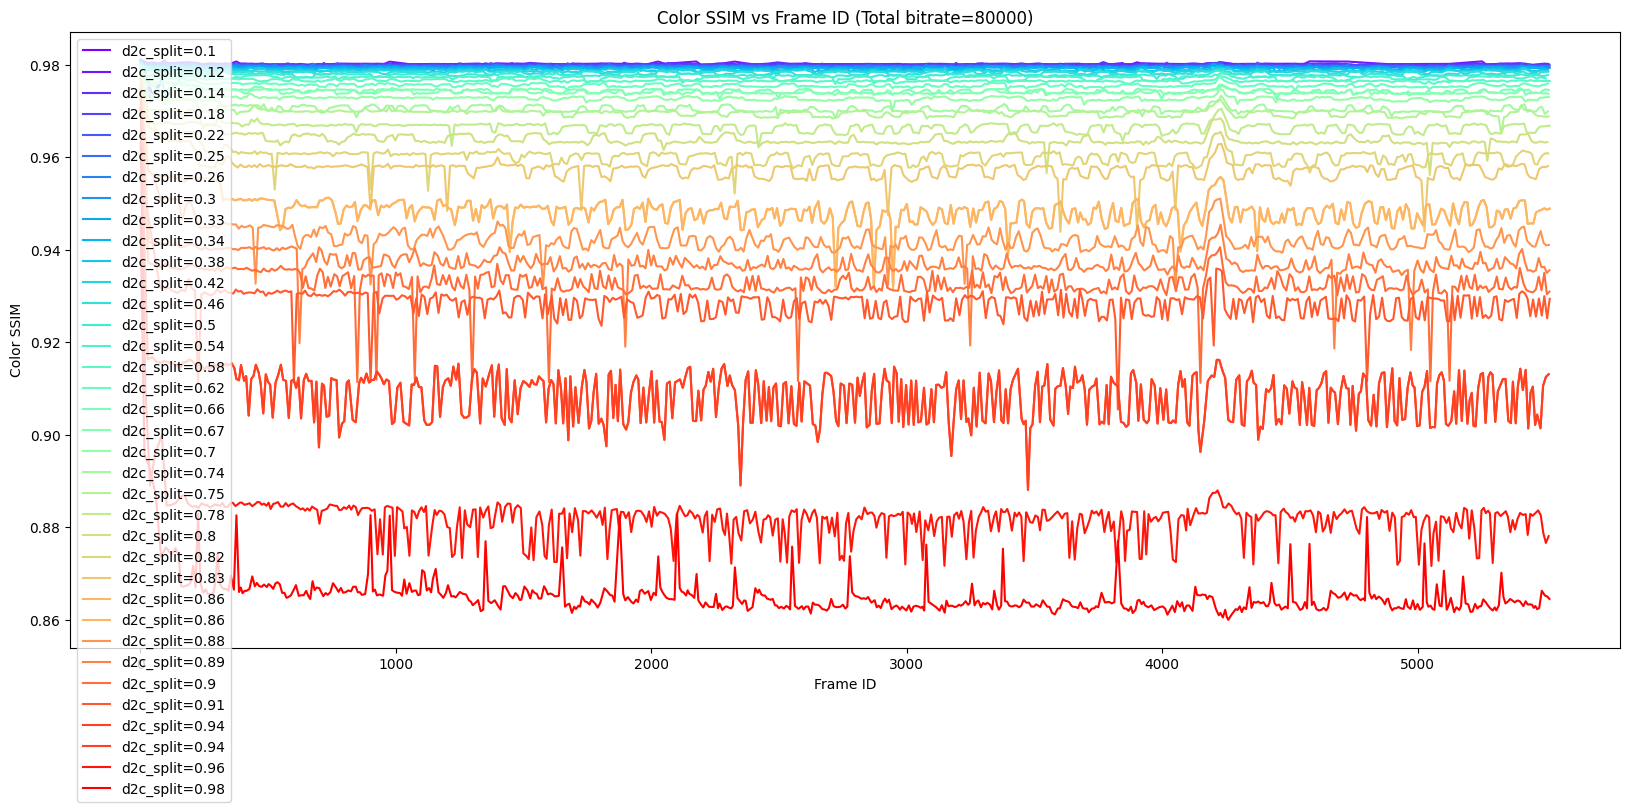

In [29]:
# plot crmse vs frameid
plt.figure(figsize=(20, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(d2c_splits_str)))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["cRMSE"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Color RMSE")
plt.title(f"Color RMSE vs Frame ID (Total bitrate={bwe})")
plt.show()

# plot cpsnr vs frameid
plt.figure(figsize=(20, 8))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["cPSNR"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Color PSNR")
plt.title(f"Color PSNR vs Frame ID (Total bitrate={bwe})")
plt.show()

# plot cssim vs frameid
plt.figure(figsize=(20, 8))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["cSSIM"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Color SSIM")
plt.title(f"Color SSIM vs Frame ID (Total bitrate={bwe})")
plt.show()

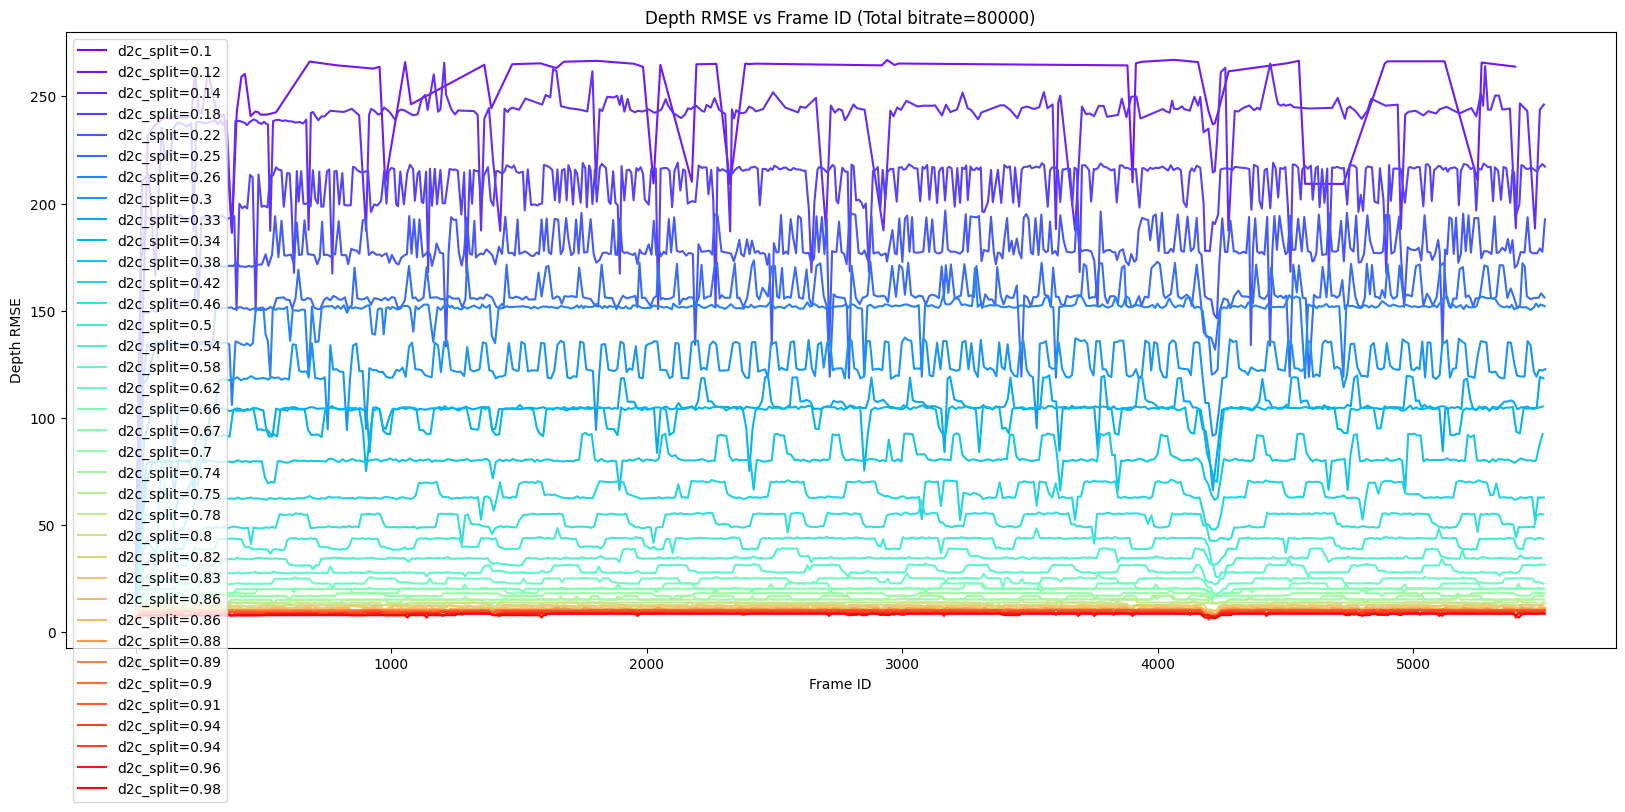

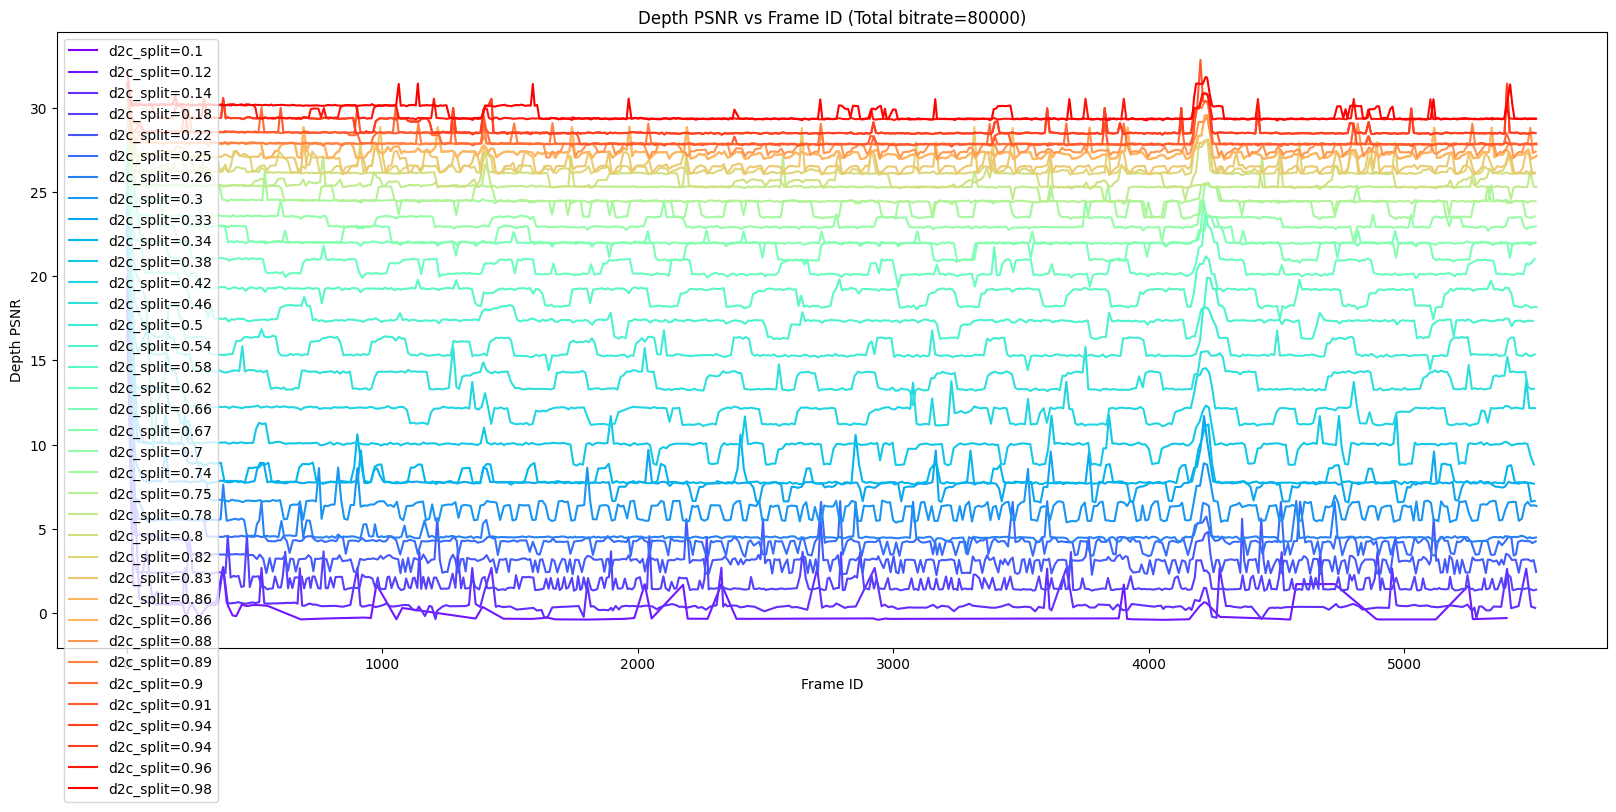

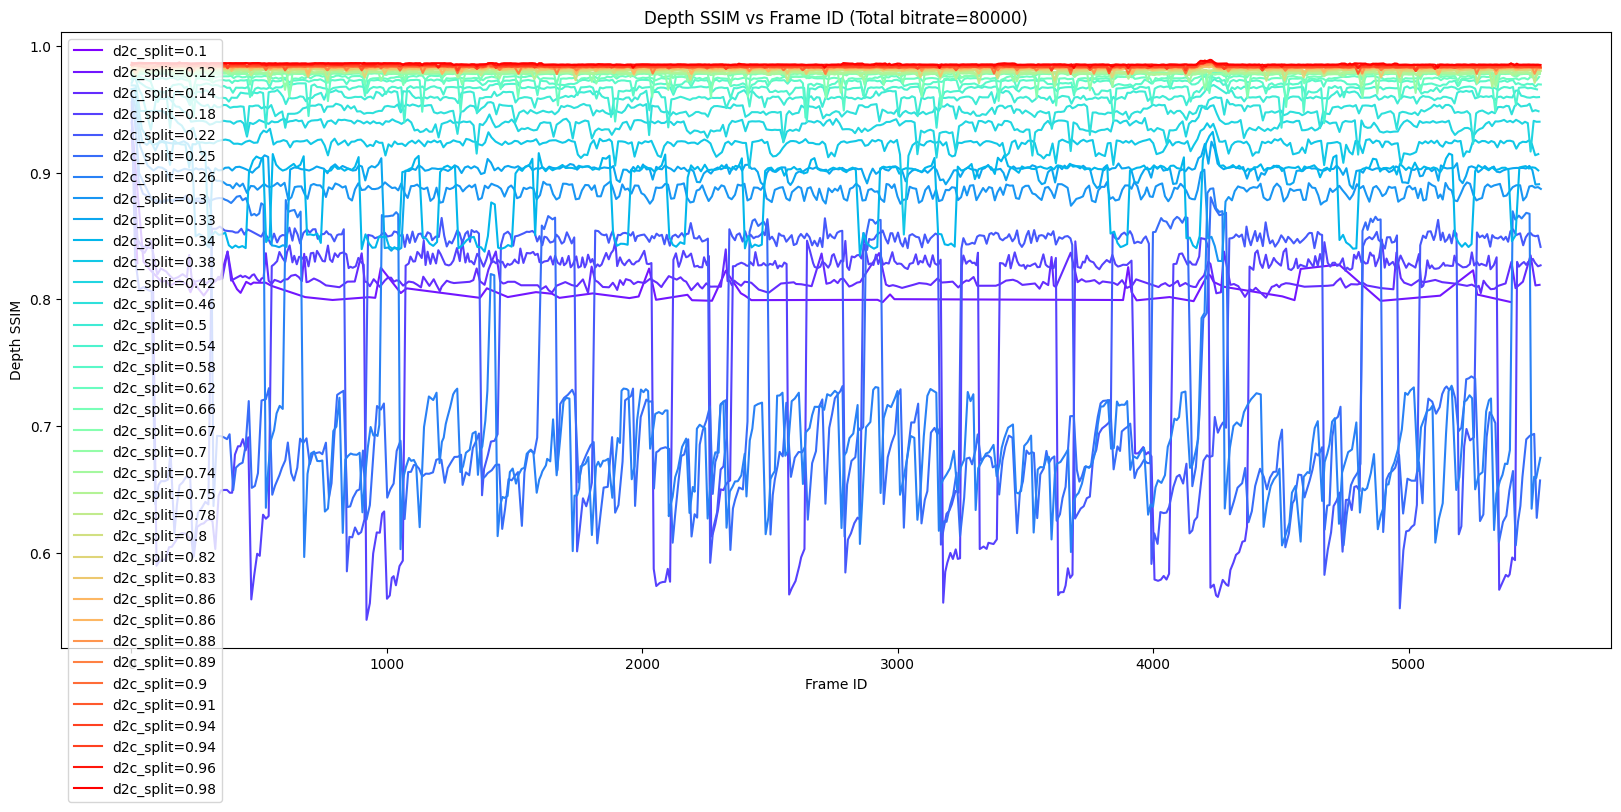

In [30]:
# plot drmse vs frameid
plt.figure(figsize=(20, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(d2c_splits_str)))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["dRMSE"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Depth RMSE")
plt.title(f"Depth RMSE vs Frame ID (Total bitrate={bwe})")
plt.show()

# plot dpsnr vs frameid
plt.figure(figsize=(20, 8))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["dPSNR"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Depth PSNR")
plt.title(f"Depth PSNR vs Frame ID (Total bitrate={bwe})")
plt.show()

# plot dssim vs frameid
plt.figure(figsize=(20, 8))

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    plt.plot(
        data["FrameID"],
        data["dSSIM"],
        label=f"d2c_split={d2c_split_str}",
        color=colors[d2c_splits_str.index(d2c_split_str)],
    )
plt.legend()
plt.xlabel("Frame ID")
plt.ylabel("Depth SSIM")
plt.title(f"Depth SSIM vs Frame ID (Total bitrate={bwe})")
plt.show()

In [31]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 6)

output_dir = "/home/lei/rajrup/KinectStream/Scripts/bitrate_splitting/bitrate_split_rmse_study/plots"

d2c_split: 0.1, avg. crmse: 3.567965, avg. drmse: 122.98349999999999
d2c_split: 0.12, avg. crmse: 3.601257631578947, avg. drmse: 246.74246052631574
d2c_split: 0.14, avg. crmse: 3.5778267457627124, avg. drmse: 238.9883301694915
d2c_split: 0.18, avg. crmse: 3.5857271978022, avg. drmse: 208.61074835164843
d2c_split: 0.22, avg. crmse: 3.5941283527131778, avg. drmse: 177.96501356589158
d2c_split: 0.25, avg. crmse: 3.6000054214123023, avg. drmse: 156.15436218678818
d2c_split: 0.26, avg. crmse: 3.601849684210525, avg. drmse: 149.37661242105276
d2c_split: 0.3, avg. crmse: 3.6154439639639624, avg. drmse: 123.97045855855858
d2c_split: 0.33, avg. crmse: 3.626350302325579, avg. drmse: 104.15432395348836
d2c_split: 0.34, avg. crmse: 3.6363159999999994, avg. drmse: 100.6966983333334
d2c_split: 0.38, avg. crmse: 3.646515694444446, avg. drmse: 80.67235069444445
d2c_split: 0.42, avg. crmse: 3.6678288863636372, avg. drmse: 64.18936000000006
d2c_split: 0.46, avg. crmse: 3.6943805494505475, avg. drmse: 51

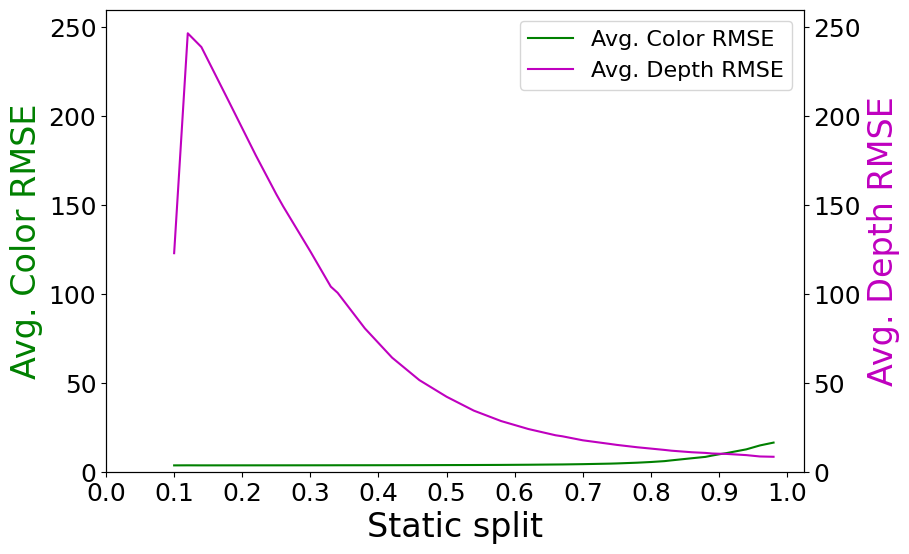

In [32]:
# plot avg. crmse, avg.drmse vs d2c_split, where avg. crmse is on left y-axis and avg. drmse is on right y-axis. Also, add legend to the plot

d2c_splits = []
avg_crmse = []
avg_drmse = []

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    avg_crmse.append(data["cRMSE"].mean())
    avg_drmse.append(data["dRMSE"].mean())
    d2c_splits.append(float(d2c_split_str))

    print(
        f"d2c_split: {d2c_split_str}, avg. crmse: {avg_crmse[-1]}, avg. drmse: {avg_drmse[-1]}"
    )

avg_crmse = np.array(avg_crmse)
avg_drmse = np.array(avg_drmse)

fig, ax1 = plt.subplots(figsize=figsize)

ax2 = ax1.twinx()
ax1.plot(d2c_splits, avg_crmse, "g-", label="Avg. Color RMSE")
ax2.plot(d2c_splits, avg_drmse, "m-", label="Avg. Depth RMSE")

ax1.set_xticks(np.arange(0, 1.1, 0.1))

ax1.set_xlabel("Static split", fontsize=xylabel_font)
ax1.set_ylabel("Avg. Color RMSE", color="g", fontsize=xylabel_font)
ax2.set_ylabel("Avg. Depth RMSE", color="m", fontsize=xylabel_font)
ax1.tick_params(axis="x", rotation=0, labelsize=xytick_font)
ax1.set_ylim(0, 260)
ax2.set_ylim(0, 260)
ax1.tick_params(axis="y", labelsize=xytick_font)
ax2.tick_params(axis="y", labelsize=xytick_font)
# plt.title(f"Color RMSE, Depth RMSE vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper right",
    #    ncol=2,
    fontsize=legend_font,
)

# plt.show()

plt.savefig(
    os.path.join(output_dir, f"color_depth_rmse_vs_split_bwe{bwe}.pdf"),
    bbox_inches="tight",
)

In [64]:
xytick_font = 18
xylabel_font = 18
legend_font = 16

figsize = (9, 2.6)

d2c_split: 0.1, avg. crmse: 3.567965, avg. drmse: 122.98349999999999
d2c_split: 0.12, avg. crmse: 3.601257631578947, avg. drmse: 246.74246052631574
d2c_split: 0.14, avg. crmse: 3.5778267457627124, avg. drmse: 238.9883301694915
d2c_split: 0.18, avg. crmse: 3.5857271978022, avg. drmse: 208.61074835164843
d2c_split: 0.22, avg. crmse: 3.5941283527131778, avg. drmse: 177.96501356589158
d2c_split: 0.25, avg. crmse: 3.6000054214123023, avg. drmse: 156.15436218678818
d2c_split: 0.26, avg. crmse: 3.601849684210525, avg. drmse: 149.37661242105276
d2c_split: 0.3, avg. crmse: 3.6154439639639624, avg. drmse: 123.97045855855858
d2c_split: 0.33, avg. crmse: 3.626350302325579, avg. drmse: 104.15432395348836
d2c_split: 0.34, avg. crmse: 3.6363159999999994, avg. drmse: 100.6966983333334
d2c_split: 0.38, avg. crmse: 3.646515694444446, avg. drmse: 80.67235069444445
d2c_split: 0.42, avg. crmse: 3.6678288863636372, avg. drmse: 64.18936000000006
d2c_split: 0.46, avg. crmse: 3.6943805494505475, avg. drmse: 51

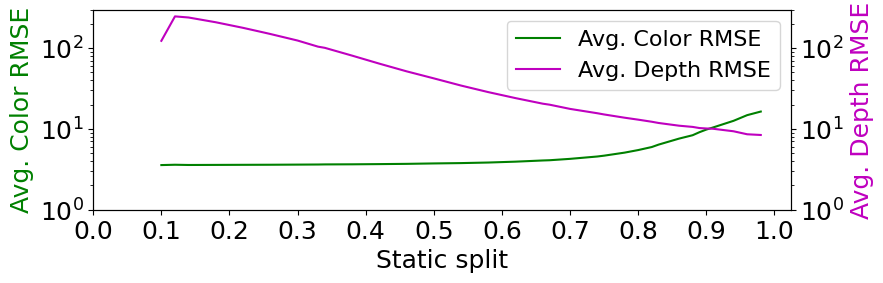

In [65]:
# plot avg. crmse, avg.drmse vs d2c_split, where avg. crmse is on left y-axis and avg. drmse is on right y-axis. Plot y-axis in log scale. Also, add legend to the plot

d2c_splits = []
avg_crmse = []
avg_drmse = []

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    avg_crmse.append(data["cRMSE"].mean())
    avg_drmse.append(data["dRMSE"].mean())
    d2c_splits.append(float(d2c_split_str))

    print(
        f"d2c_split: {d2c_split_str}, avg. crmse: {avg_crmse[-1]}, avg. drmse: {avg_drmse[-1]}"
    )

avg_crmse = np.array(avg_crmse)
avg_drmse = np.array(avg_drmse)

fig, ax1 = plt.subplots(figsize=figsize)

ax2 = ax1.twinx()
ax1.plot(d2c_splits, avg_crmse, "g-", label="Avg. Color RMSE")
ax2.plot(d2c_splits, avg_drmse, "m-", label="Avg. Depth RMSE")

# Set log scale for both y-axes
ax1.set_yscale("log")
ax2.set_yscale("log")

ax1.set_xticks(np.arange(0, 1.1, 0.1))
ax1.set_xlabel("Static split", fontsize=xylabel_font)
ax1.set_ylabel("Avg. Color RMSE", color="g", fontsize=xylabel_font)
ax2.set_ylabel("Avg. Depth RMSE", color="m", fontsize=xylabel_font)
ax1.tick_params(axis="x", rotation=0, labelsize=xytick_font)
ax1.set_ylim(1, 300)
ax2.set_ylim(1, 300)
ax1.tick_params(axis="y", labelsize=xytick_font)
ax2.tick_params(axis="y", labelsize=xytick_font)
# plt.title(f"Color RMSE, Depth RMSE vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper right",
    #    ncol=2,
    fontsize=legend_font,
)

# plt.show()

plt.savefig(
    os.path.join(output_dir, f"color_depth_rmse_vs_split_bwe{bwe}_logscale.pdf"),
    bbox_inches="tight",
)

d2c_split: 0.1, avg. cpsnr: 37.082499999999996, avg. dpsnr: 9.28571
d2c_split: 0.12, avg. cpsnr: 37.01048552631579, avg. dpsnr: 0.4474709473684211
d2c_split: 0.14, avg. cpsnr: 37.05844305084745, avg. dpsnr: 0.6190120203389824
d2c_split: 0.18, avg. cpsnr: 37.03928278388276, avg. dpsnr: 1.7795877472527484
d2c_split: 0.22, avg. cpsnr: 37.018961627907004, avg. dpsnr: 3.16649589147287
d2c_split: 0.25, avg. cpsnr: 37.00476628701595, avg. dpsnr: 4.305652095671982
d2c_split: 0.26, avg. cpsnr: 37.00031915789473, avg. dpsnr: 4.683691010526314
d2c_split: 0.3, avg. cpsnr: 36.96762522522523, avg. dpsnr: 6.318157860360373
d2c_split: 0.33, avg. cpsnr: 36.94147488372096, avg. dpsnr: 7.832190232558131
d2c_split: 0.34, avg. cpsnr: 36.91986738095238, avg. dpsnr: 8.126208095238095
d2c_split: 0.38, avg. cpsnr: 36.89331504629629, avg. dpsnr: 10.045973865740741
d2c_split: 0.42, avg. cpsnr: 36.84271227272728, avg. dpsnr: 12.038825000000001
d2c_split: 0.46, avg. cpsnr: 36.78017054945054, avg. dpsnr: 13.9338804

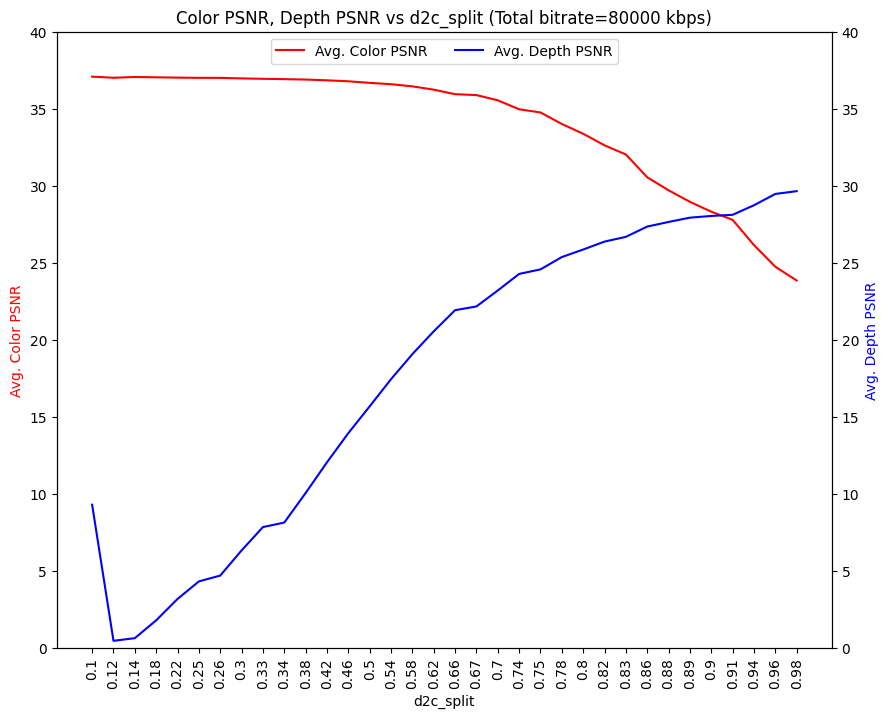

d2c_split: 0.1, avg. cssim: 0.98079, avg. dssim: 0.88108
d2c_split: 0.12, avg. cssim: 0.9801236842105263, avg. dssim: 0.8106951578947368
d2c_split: 0.14, avg. cssim: 0.9801756135593223, avg. dssim: 0.8152002135593229
d2c_split: 0.18, avg. cssim: 0.980015767399267, avg. dssim: 0.7774166208791209
d2c_split: 0.22, avg. cssim: 0.9798407635658912, avg. dssim: 0.8010388062015502
d2c_split: 0.25, avg. cssim: 0.9797044100227785, avg. dssim: 0.7018485694760822
d2c_split: 0.26, avg. cssim: 0.9796773178947373, avg. dssim: 0.7071350673684207
d2c_split: 0.3, avg. cssim: 0.9794735608108099, avg. dssim: 0.8862923063063056
d2c_split: 0.33, avg. cssim: 0.9792794023255808, avg. dssim: 0.9011058767441863
d2c_split: 0.34, avg. cssim: 0.9791981500000007, avg. dssim: 0.8908349071428573
d2c_split: 0.38, avg. cssim: 0.9789328680555563, avg. dssim: 0.9232183101851853
d2c_split: 0.42, avg. cssim: 0.9786362386363621, avg. dssim: 0.9380967363636374
d2c_split: 0.46, avg. cssim: 0.9782556439560428, avg. dssim: 0.94

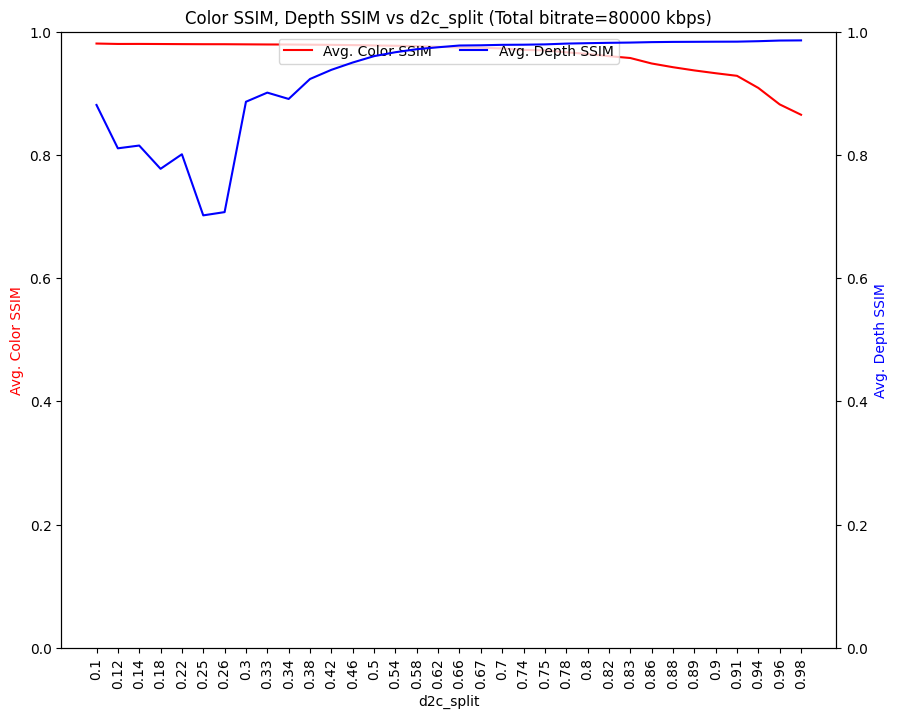

In [34]:
# plot avg. cpsnr, avg.dpsnr vs d2c_split, where avg. cpsnr is on left y-axis and avg. dpsnr is on right y-axis

avg_cpsnr = []
avg_dpsnr = []

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    avg_cpsnr.append(data["cPSNR"].mean())
    avg_dpsnr.append(data["dPSNR"].mean())

    print(
        f"d2c_split: {d2c_split_str}, avg. cpsnr: {avg_cpsnr[-1]}, avg. dpsnr: {avg_dpsnr[-1]}"
    )

d2c_splits = np.array(d2c_splits)
avg_cpsnr = np.array(avg_cpsnr)
avg_dpsnr = np.array(avg_dpsnr)

fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(d2c_splits_str, avg_cpsnr, "r-", label="Avg. Color PSNR")
ax2.plot(d2c_splits_str, avg_dpsnr, "b-", label="Avg. Depth PSNR")

ax1.set_xlabel("d2c_split")
ax1.set_ylabel("Avg. Color PSNR", color="r")
ax2.set_ylabel("Avg. Depth PSNR", color="b")
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylim(0, 40)
ax2.set_ylim(0, 40)
plt.title(f"Color PSNR, Depth PSNR vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
plt.show()

# plot avg. cssim, avg.dssim vs d2c_split, where avg. cssim is on left y-axis and avg. dssim is on right y-axis

avg_cssim = []
avg_dssim = []

for d2c_split_str in d2c_splits_str:
    data = data_dict[d2c_split_str]
    avg_cssim.append(data["cSSIM"].mean())
    avg_dssim.append(data["dSSIM"].mean())

    print(
        f"d2c_split: {d2c_split_str}, avg. cssim: {avg_cssim[-1]}, avg. dssim: {avg_dssim[-1]}"
    )

avg_cssim = np.array(avg_cssim)
avg_dssim = np.array(avg_dssim)

fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(d2c_splits_str, avg_cssim, "r-", label="Avg. Color SSIM")
ax2.plot(d2c_splits_str, avg_dssim, "b-", label="Avg. Depth SSIM")

ax1.set_xlabel("d2c_split")
ax1.set_ylabel("Avg. Color SSIM", color="r")
ax2.set_ylabel("Avg. Depth SSIM", color="b")
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
plt.title(f"Color SSIM, Depth SSIM vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
plt.show()

In [35]:
# Create a dataframe to store all the data
metric_dict = {
    "d2c_split": d2c_splits,
    "avg_crmse": avg_crmse,
    "avg_drmse": avg_drmse,
    "diff_crmse": avg_crmse - avg_drmse,
    "avg_cpsnr": avg_cpsnr,
    "avg_dpsnr": avg_dpsnr,
    "diff_cpsnr": avg_cpsnr - avg_dpsnr,
    "avg_cssim": avg_cssim,
    "avg_dssim": avg_dssim,
    "diff_cssim": avg_cssim - avg_dssim,
}

metric_df = pd.DataFrame(metric_dict)

In [36]:
metric_df

d2c_split  avg_crmse   avg_drmse  diff_crmse  avg_cpsnr  avg_dpsnr  \
0        0.10   3.567965  122.983500 -119.415535  37.082500   9.285710   
1        0.12   3.601258  246.742461 -243.141203  37.010486   0.447471   
2        0.14   3.577827  238.988330 -235.410503  37.058443   0.619012   
3        0.18   3.585727  208.610748 -205.025021  37.039283   1.779588   
4        0.22   3.594128  177.965014 -174.370885  37.018962   3.166496   
5        0.25   3.600005  156.154362 -152.554357  37.004766   4.305652   
6        0.26   3.601850  149.376612 -145.774763  37.000319   4.683691   
7        0.30   3.615444  123.970459 -120.355015  36.967625   6.318158   
8        0.33   3.626350  104.154324 -100.527974  36.941475   7.832190   
9        0.34   3.636316  100.696698  -97.060382  36.919867   8.126208   
10       0.38   3.646516   80.672351  -77.025835  36.893315  10.045974   
11       0.42   3.667829   64.189360  -60.521531  36.842712  12.038825   
12       0.46   3.694381   51.558171  -47.863790  36.780171  13.933880   
13       0.50   3.739134   42.197313  -38.458179  36.677306  15.672441   
14       0.54   3.774903   34.372229  -30.597327  36.593059  17.437711   
15       0.58   3.836591   28.517851  -24.681260  36.452131  19.063830   
16       0.62   3.933044   24.037954  -20.104909  36.236711  20.543226   
17       0.66   4.068072   20.510428  -16.442357  35.943947  21.917283   
18       0.67   4.095596   19.933667  -15.838071  35.885283  22.159658   
19       0.70   4.259694   17.680543  -13.420849  35.544154  23.196026   
20       0.74   4.554903   15.626818  -11.071915  34.963754  24.272189   
21       0.75   4.664917   15.091735  -10.426818  34.756832  24.566003   
22       0.78   5.085213   13.760210   -8.674997  34.009477  25.366717   
23       0.80   5.471203   13.015623   -7.544420  33.374338  25.855908   
24       0.82   5.967092   12.262157   -6.295065  32.623535  26.370042   
25       0.83   6.392178   11.838593   -5.446415  32.026339  26.679300   
26       0.86   7.582970   10.957774   -3.374804  30.547259  27.345920   
27       0.86   7.582970   10.957774   -3.374804  30.547259  27.345920   
28       0.88   8.353913   10.583405   -2.229492  29.703876  27.645863   
29       0.89   9.107167   10.247299   -1.140131  28.953103  27.925641   
30       0.90   9.804682   10.122658   -0.317977  28.313735  28.035333   
31       0.91  10.421077   10.037733    0.383345  27.783597  28.111428   
32       0.94  12.588108    9.347639    3.240469  26.144553  28.730703   
33       0.94  12.588108    9.347639    3.240469  26.144553  28.730703   
34       0.96  14.793548    8.581501    6.212047  24.737902  29.465114   
35       0.98  16.393066    8.410579    7.982487  23.844191  29.646137   

    diff_cpsnr  avg_cssim  avg_dssim  diff_cssim  
0    27.796790   0.980790   0.881080    0.099710  
1    36.563015   0.980124   0.810695    0.169429  
2    36.439431   0.980176   0.815200    0.164975  
3    35.259695   0.980016   0.777417    0.202599  
4    33.852466   0.979841   0.801039    0.178802  
5    32.699114   0.979704   0.701849    0.277856  
6    32.316628   0.979677   0.707135    0.272542  
7    30.649467   0.979474   0.886292    0.093181  
8    29.109285   0.979279   0.901106    0.078174  
9    28.793659   0.979198   0.890835    0.088363  
10   26.847341   0.978933   0.923218    0.055715  
11   24.803887   0.978636   0.938097    0.040540  
12   22.846290   0.978256   0.949980    0.028275  
13   21.004865   0.977727   0.960323    0.017404  
14   19.155348   0.977233   0.966682    0.010551  
15   17.388301   0.976577   0.971587    0.004989  
16   15.693485   0.975603   0.974752    0.000851  
17   14.026664   0.974344   0.977580   -0.003236  
18   13.725624   0.974113   0.977948   -0.003834  
19   12.348127   0.972765   0.978688   -0.005924  
20   10.691565   0.970484   0.978895   -0.008411  
21   10.190829   0.969710   0.979417   -0.009708  
22    8.642760   0.966607   0.980705   -0.014098  
23    7.518430   0.963849   0.981370   -0

In [37]:
# Normalize avg. crmse, avg. cpsnr, avg. cssim, avg. drmse, avg. dpsnr, avg. dssim
max_crmse = np.max(avg_crmse)
max_cpsnr = np.max(avg_cpsnr)
max_cssim = np.max(avg_cssim)
max_drmse = np.max(avg_drmse)
max_dpsnr = np.max(avg_dpsnr)
max_dssim = np.max(avg_dssim)

norm_avg_crmse = avg_crmse / max_crmse
norm_avg_cpsnr = avg_cpsnr / max_cpsnr
norm_avg_cssim = avg_cssim / max_cssim
norm_avg_drmse = avg_drmse / max_drmse
norm_avg_dpsnr = avg_dpsnr / max_dpsnr
norm_avg_dssim = avg_dssim / max_dssim

# Add normalized data to the dataframe
metric_dict = {
    "d2c_split": d2c_splits,
    "norm_avg_crmse": norm_avg_crmse,
    "norm_avg_drmse": norm_avg_drmse,
    "diff_avg_rmse": norm_avg_crmse - norm_avg_drmse,
    "norm_avg_cpsnr": norm_avg_cpsnr,
    "norm_avg_dpsnr": norm_avg_dpsnr,
    "diff_avg_psnr": norm_avg_cpsnr - norm_avg_dpsnr,
    "norm_avg_cssim": norm_avg_cssim,
    "norm_avg_dssim": norm_avg_dssim,
    "diff_avg_ssim": norm_avg_cssim - norm_avg_dssim,
}

norm_metric_df = pd.DataFrame(metric_dict)

In [38]:
norm_metric_df

d2c_split  norm_avg_crmse  norm_avg_drmse  diff_avg_rmse  norm_avg_cpsnr  \
0        0.10        0.217651        0.498429      -0.280778        1.000000   
1        0.12        0.219682        1.000000      -0.780318        0.998058   
2        0.14        0.218252        0.968574      -0.750322        0.999351   
3        0.18        0.218734        0.845459      -0.626725        0.998835   
4        0.22        0.219247        0.721258      -0.502011        0.998287   
5        0.25        0.219605        0.632864      -0.413258        0.997904   
6        0.26        0.219718        0.605395      -0.385677        0.997784   
7        0.30        0.220547        0.502429      -0.281881        0.996902   
8        0.33        0.221212        0.422118      -0.200905        0.996197   
9        0.34        0.221820        0.408104      -0.186284        0.995614   
10       0.38        0.222443        0.326950      -0.104507        0.994898   
11       0.42        0.223743        0.260147      -0.036404        0.993534   
12       0.46        0.225362        0.208955       0.016407        0.991847   
13       0.50        0.228092        0.171018       0.057075        0.989073   
14       0.54        0.230274        0.139304       0.090970        0.986801   
15       0.58        0.234037        0.115577       0.118460        0.983001   
16       0.62        0.239921        0.097421       0.142500        0.977192   
17       0.66        0.248158        0.083125       0.165033        0.969297   
18       0.67        0.249837        0.080787       0.169050        0.967715   
19       0.70        0.259847        0.071656       0.188191        0.958516   
20       0.74        0.277855        0.063333       0.214523        0.942864   
21       0.75        0.284566        0.061164       0.223403        0.937284   
22       0.78        0.310205        0.055767       0.254438        0.917130   
23       0.80        0.333751        0.052750       0.281001        0.900002   
24       0.82        0.364001        0.049696       0.314305        0.879756   
25       0.83        0.389932        0.047980       0.341952        0.863651   
26       0.86        0.462572        0.044410       0.418162        0.823765   
27       0.86        0.462572        0.044410       0.418162        0.823765   
28       0.88        0.509600        0.042893       0.466708        0.801021   
29       0.89        0.555550        0.041530       0.514020        0.780775   
30       0.90        0.598099        0.041025       0.557074        0.763534   
31       0.91        0.635700        0.040681       0.595019        0.749237   
32       0.94        0.767892        0.037884       0.730008        0.705037   
33       0.94        0.767892        0.037884       0.730008        0.705037   
34       0.96        0.902427        0.034779       0.867648        0.667104   
35       0.98        1.000000        0.034086       0.965914        0.643004   

    norm_avg_dpsnr  diff_avg_psnr  norm_avg_cssim  norm_avg_dssim  \
0         0.313218       0.686782        1.000000        0.893693   
1         0.015094       0.982964        0.999321        0.822301   
2         0.020880       0.978471        0.999374        0.826871   
3         0.060028       0.938807        0.999211        0.788546   
4         0.106810       0.891477        0.999032        0.812506   
5         0.145235       0.852669        0.998893        0.711896   
6         0.157987       0.839797        0.998866        0.717258   
7         0.213119       0.783783        0.998658        0.898980   
8         0.264189       0.732008        0.998460        0.914006   
9         0.274107       0.721507        0.998377        0.903588   
10        0.338863       0.656035        0.998106        0.936435   
11        0.406084       0.587450        0.997804        0.951526   
12        0.470007       0.521840        0.997416        0.963580   
13        0.528650       0.460423        0.996877        0.974071   
14      

d2c_split: 0.1, avg. crmse: 0.21765086467766398, avg. drmse: 0.4984286034015758, diff(drmse-crmse): 0.2807777387239118
d2c_split: 0.12, avg. crmse: 0.21968176185590219, avg. drmse: 1.0, diff(drmse-crmse): 0.7803182381440978
d2c_split: 0.14, avg. crmse: 0.21825244498814506, avg. drmse: 0.9685739927360526, diff(drmse-crmse): 0.7503215477479075
d2c_split: 0.18, avg. crmse: 0.21873438363320993, avg. drmse: 0.8454594637123656, diff(drmse-crmse): 0.6267250800791556
d2c_split: 0.22, avg. crmse: 0.21924686585505498, avg. drmse: 0.7212581619972585, diff(drmse-crmse): 0.5020112961422034
d2c_split: 0.25, avg. crmse: 0.21960537528105398, avg. drmse: 0.6328637635115659, diff(drmse-crmse): 0.413258388230512
d2c_split: 0.26, avg. crmse: 0.2197178778960533, avg. drmse: 0.6053948400385727, diff(drmse-crmse): 0.3856769621425194
d2c_split: 0.3, avg. crmse: 0.22054714801025163, avg. drmse: 0.5024285576715192, diff(drmse-crmse): 0.2818814096612675
d2c_split: 0.33, avg. crmse: 0.22121244993302078, avg. drms

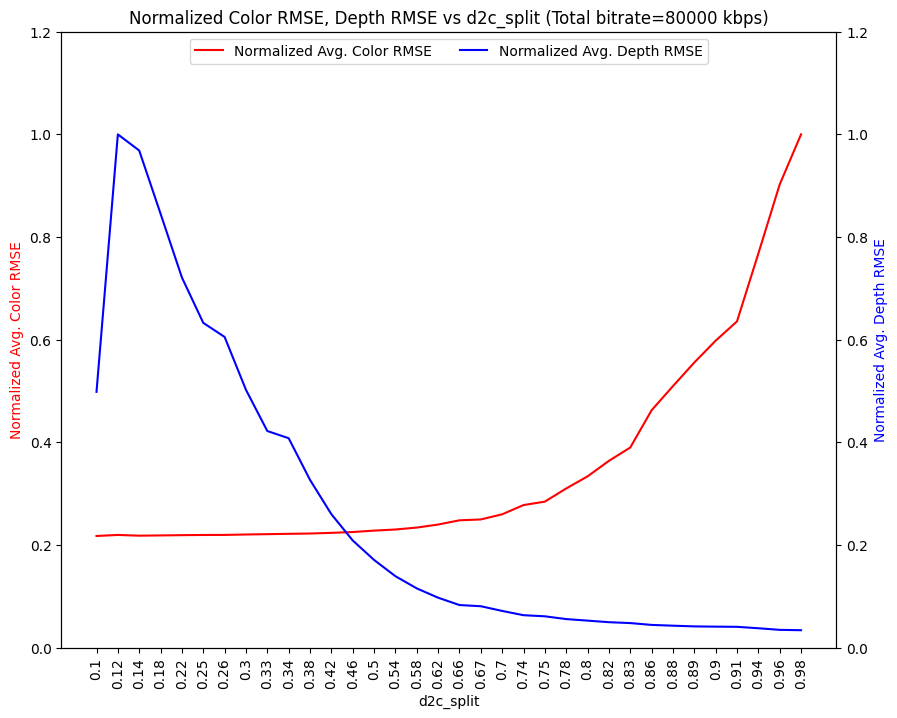

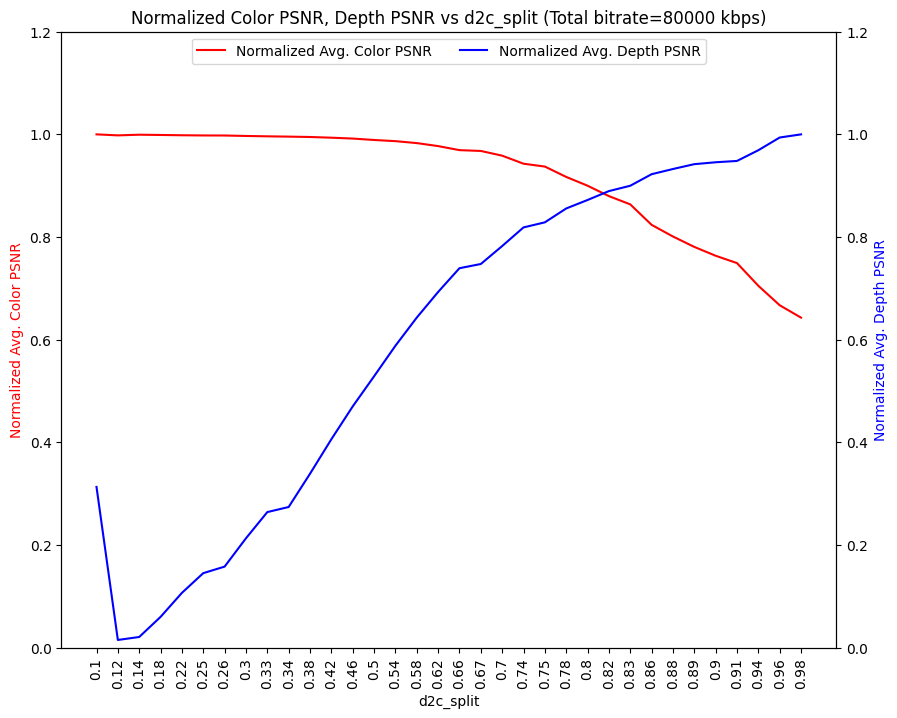

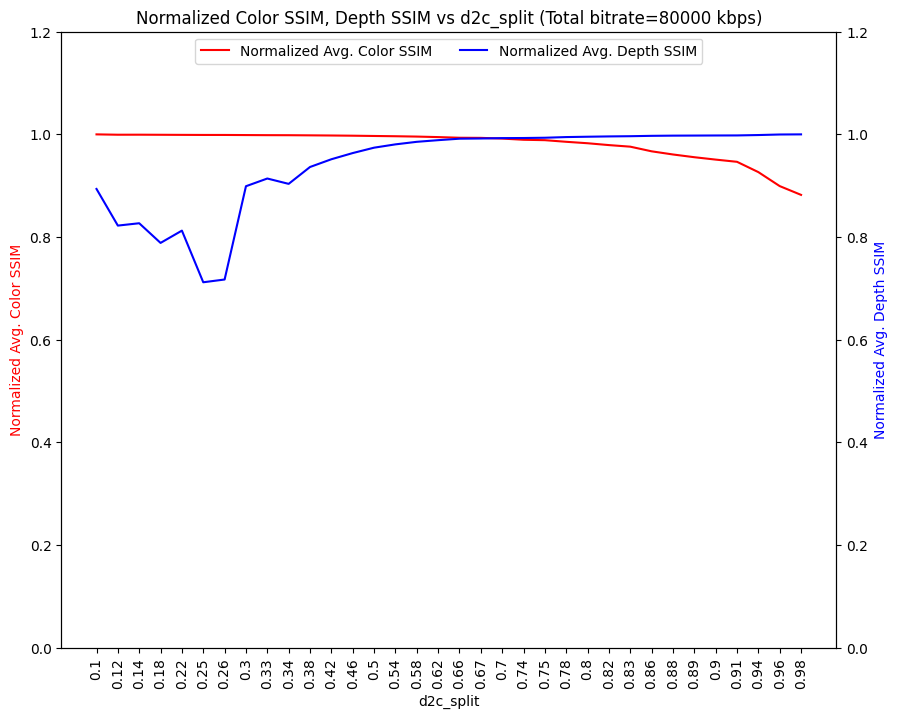

In [39]:
for d2c_split, crmse, drmse in zip(d2c_splits, norm_avg_crmse, norm_avg_drmse):
    print(
        f"d2c_split: {d2c_split}, avg. crmse: {crmse}, avg. drmse: {drmse}, diff(drmse-crmse): {drmse-crmse}"
    )

fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(d2c_splits_str, norm_avg_crmse, "r-", label="Normalized Avg. Color RMSE")
ax2.plot(d2c_splits_str, norm_avg_drmse, "b-", label="Normalized Avg. Depth RMSE")
ax1.set_xlabel("d2c_split")
ax1.set_ylabel("Normalized Avg. Color RMSE", color="r")
ax2.set_ylabel("Normalized Avg. Depth RMSE", color="b")
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylim([0, 1.2])
ax2.set_ylim([0, 1.2])
plt.title(f"Normalized Color RMSE, Depth RMSE vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
plt.show()


fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(d2c_splits_str, norm_avg_cpsnr, "r-", label="Normalized Avg. Color PSNR")
ax2.plot(d2c_splits_str, norm_avg_dpsnr, "b-", label="Normalized Avg. Depth PSNR")
ax1.set_xlabel("d2c_split")
ax1.set_ylabel("Normalized Avg. Color PSNR", color="r")
ax2.set_ylabel("Normalized Avg. Depth PSNR", color="b")
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylim([0, 1.2])
ax2.set_ylim([0, 1.2])
plt.title(f"Normalized Color PSNR, Depth PSNR vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(d2c_splits_str, norm_avg_cssim, "r-", label="Normalized Avg. Color SSIM")
ax2.plot(d2c_splits_str, norm_avg_dssim, "b-", label="Normalized Avg. Depth SSIM")
ax1.set_xlabel("d2c_split")
ax1.set_ylabel("Normalized Avg. Color SSIM", color="r")
ax2.set_ylabel("Normalized Avg. Depth SSIM", color="b")
ax1.tick_params(axis="x", rotation=90)
ax1.set_ylim([0, 1.2])
ax2.set_ylim([0, 1.2])
plt.title(f"Normalized Color SSIM, Depth SSIM vs d2c_split (Total bitrate={bwe} kbps)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", ncol=2)
plt.show()

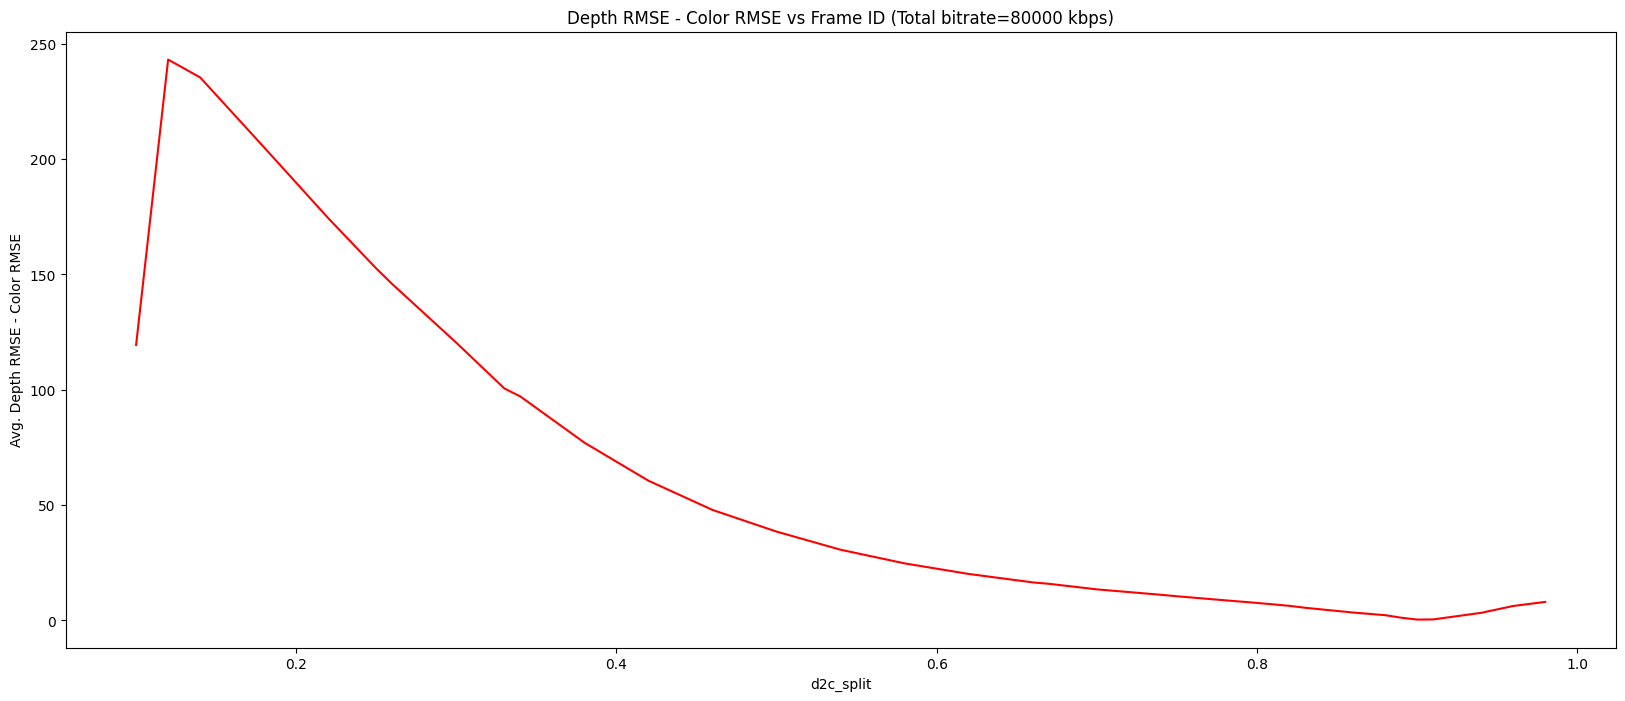

In [40]:
# Plot drmse - crmse vs frameid
plt.figure(figsize=(20, 8))

plt.plot(
    d2c_splits,
    np.abs(avg_drmse - avg_crmse),
    "r-",
    label="Normalized Avg. Depth RMSE - Color RMSE",
)
plt.xlabel("d2c_split")
plt.ylabel("Avg. Depth RMSE - Color RMSE")
# plt.ylim([0, 10])
# plt.xlim([0.8, 1.2])
plt.title(f"Depth RMSE - Color RMSE vs Frame ID (Total bitrate={bwe} kbps)")
plt.show()

In [41]:
def find_intersection(f1_values, f2_values, x_values, tolerance=1e-6):
    # Compute g(x) = f2(x) - f1(x) for given x-values (assuming g(x) is monotonically decreasing)
    g_values = [f2 - f1 for f1, f2 in zip(f1_values, f2_values)]

    print(f"x_values: {x_values}")
    print(f"f1_values: {f1_values}")
    print(f"f2_values: {f2_values}")
    print(f"g_values: {g_values}")

    # Ensure g(x) changes sign
    if g_values[0] * g_values[-1] > 0:
        raise ValueError("No intersection found in the given range")

    # Binary search for the intersection
    low, high = 0, len(x_values) - 1
    while high - low > 1:
        mid = (low + high) // 2
        print(f"x_mid: {x_values[mid]}, g_mid: {g_values[mid]}")
        if abs(g_values[mid]) < tolerance:
            return x_values[mid]
        elif g_values[mid] > 0:
            low = mid
        else:
            high = mid

    print(f"x_low: {x_values[low]}, x_high: {x_values[high]}")
    print(f"g_low: {g_values[low]}, g_high: {g_values[high]}")

    # Interpolate between low and high for better precision
    x_low, x_high = x_values[low], x_values[high]
    g_low, g_high = g_values[low], g_values[high]
    return x_low - g_low * (x_high - x_low) / (g_high - g_low)  # Linear interpolation

In [42]:
indices = d2c_splits > 0.18
d2c_splits_mod = d2c_splits[indices]
avg_crmse_mod = avg_crmse[indices]
avg_drmse_mod = avg_drmse[indices]

In [43]:
d2c_split_opt = find_intersection(avg_crmse_mod, avg_drmse_mod, d2c_splits_mod)
print(f"Optimal d2c_split: {d2c_split_opt}")

x_values: [0.22 0.25 0.26 0.3  0.33 0.34 0.38 0.42 0.46 0.5  0.54 0.58 0.62 0.66
 0.67 0.7  0.74 0.75 0.78 0.8  0.82 0.83 0.86 0.86 0.88 0.89 0.9  0.91
 0.94 0.94 0.96 0.98]
f1_values: [ 3.59412835  3.60000542  3.60184968  3.61544396  3.6263503   3.636316
  3.64651569  3.66782889  3.69438055  3.7391341   3.77490263  3.83659062
  3.93304444  4.0680717   4.09559604  4.25969406  4.5549027   4.66491691
  5.08521331  5.47120299  5.96709248  6.39217831  7.58296998  7.58296998
  8.3539127   9.10716741  9.80468153 10.42107749 12.58810797 12.58810797
 14.79354805 16.39306605]
f2_values: [177.96501357 156.15436219 149.37661242 123.97045856 104.15432395
 100.69669833  80.67235069  64.18936     51.55817099  42.19731288
  34.3722293   28.51785077  24.03795392  20.5104283   19.93366702
  17.68054264  15.62681782  15.091735    13.76021006  13.01562301
  12.26215701  11.838593    10.9577736   10.9577736   10.58340479
  10.24729872  10.12265836  10.03773261   9.34763909   9.34763909
   8.58150125   8.4

In [44]:
class OnlineIntersectionFinder:
    def __init__(self, x0, f1_x0, f2_x0, tolerance=1e-6):
        # Initial guess for x_opt and corresponding function values
        self.x_opt = x0
        self.f1_x_opt = f1_x0
        self.f2_x_opt = f2_x0
        self.tolerance = tolerance
        self.iteration = 0

    def update(self, f1_x, f2_x):
        """
        Update the estimate for x_opt based on the previous guess and current function evaluations.

        Args:
            f1_x (float): Function value of f1 at the current guess.
            f2_x (float): Function value of f2 at the current guess.

        Returns:
            float: The updated x_opt for the next iteration.
        """
        # Calculate the difference between the current function evaluations
        delta_f = f1_x - f2_x

        print(
            f"Iteration: {self.iteration}, x_opt: {self.x_opt}, delta_f: {delta_f}, f1_x: {f1_x}, f2_x: {f2_x}"
        )

        # If the difference between the function evaluations is within tolerance, return current x_opt
        if abs(delta_f) <= self.tolerance:
            return self.x_opt

        # Update x_opt based on the sign of delta_f
        step_size = 0.1 * delta_f  # You can adjust the step size as needed

        new_x_opt = self.x_opt + step_size

        # # Decrease x_opt if delta_f is positive, increase x_opt if delta_f is negative
        # if delta_f > 0:
        #     new_x_opt = self.x_opt - step_size
        # else:
        #     new_x_opt = self.x_opt + step_size

        # Ensure the new guess is within the bounds [0, 1] (or the desired range)
        new_x_opt = max(0, min(1, new_x_opt))

        # Update the stored values for the next iteration
        self.x_opt = new_x_opt

        return self.x_opt


# # Example usage
# # Initial values
# x0 = 1.0
# f1_x0 = 2.0
# f2_x0 = 3.0

# # Create the finder
# finder = OnlineIntersectionFinder(x0, f1_x0, f2_x0)

# # Iterate to refine the intersection
# values = [
#     (4.0, 2.5, 0.5),  # (f1(x_opt), f2(x_opt), x_t)
#     (2.3, 2.3, 1.5),
#     (2.15, 2.15, 1.25),
# ]

# for f1_x, f2_x, x_t in values:
#     x_opt = finder.update(f1_x, f2_x, x_t)
#     print(f"Updated x_opt: {x_opt}")

In [45]:
# Example 1: Linear Functions (intersection between 0 and 1)
def f1_linear(x):
    return 1.0 - 2.0 * x


def f2_linear(x):
    return x + 0.5


# Example 2: Non-Linear Functions
def f1_exp(x):
    return np.exp(-x)


def f2_sin(x):
    return np.sin(np.pi * x)

Iteration: 0, x_opt: 0.5, delta_f: -1.0, f1_x: 0.0, f2_x: 1.0
Iteration 1: x_opt = 0.4
Iteration: 0, x_opt: 0.4, delta_f: -0.7000000000000001, f1_x: 0.19999999999999996, f2_x: 0.9
Iteration 2: x_opt = 0.33
Iteration: 0, x_opt: 0.33, delta_f: -0.4900000000000001, f1_x: 0.33999999999999997, f2_x: 0.8300000000000001
Iteration 3: x_opt = 0.281
Iteration: 0, x_opt: 0.281, delta_f: -0.3430000000000001, f1_x: 0.43799999999999994, f2_x: 0.781
Iteration 4: x_opt = 0.24670000000000003
Iteration: 0, x_opt: 0.24670000000000003, delta_f: -0.2401000000000001, f1_x: 0.5065999999999999, f2_x: 0.7467
Iteration 5: x_opt = 0.22269000000000003
Iteration: 0, x_opt: 0.22269000000000003, delta_f: -0.16807000000000016, f1_x: 0.5546199999999999, f2_x: 0.72269
Iteration 6: x_opt = 0.205883
Iteration: 0, x_opt: 0.205883, delta_f: -0.11764900000000011, f1_x: 0.5882339999999999, f2_x: 0.705883
Iteration 7: x_opt = 0.1941181
Iteration: 0, x_opt: 0.1941181, delta_f: -0.08235429999999988, f1_x: 0.6117638000000001, f2

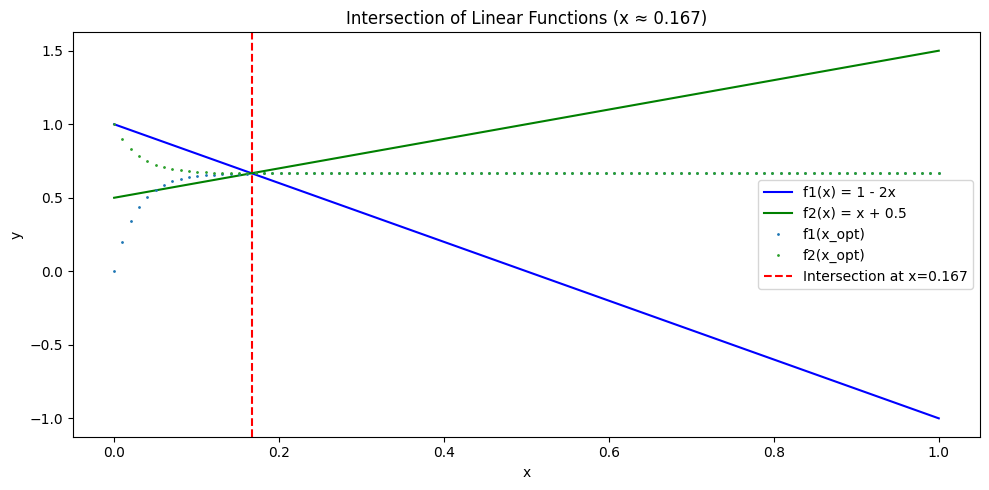

In [46]:
# Create an array of x values for plotting and testing
x_values = np.linspace(0, 1, 100)

# Compute the corresponding f1 and f2 values for both examples
f1_linear_values = f1_linear(x_values)
f2_linear_values = f2_linear(x_values)

# Example usage: Initialize at x0 = 0.5
x0 = 0.5
f1_x0 = f1_linear(x0)
f2_x0 = f2_linear(x0)

# Create the finder instance
finder = OnlineIntersectionFinder(x0, f1_x0, f2_x0)

# Iterate to refine the intersection and store x_opt values
x_opt_values = [x0]
for i in range(1, len(x_values)):
    # Probing step for the next x_opt
    x_opt = finder.update(
        f1_linear(x_opt_values[-1]), f2_linear(x_opt_values[-1])
    )  # Pass current function evaluations
    x_opt_values.append(x_opt)
    print(f"Iteration {i}: x_opt = {x_opt}")


# Define the function for finding the root (f1(x) - f2(x) = 0)
def difference(x):
    return f1_linear(x) - f2_linear(x)


x_opt_actual = fsolve(difference, 0.5)[0]
print(f"Actual x_opt: {x_opt_actual}")

# Plotting Example 1 (Linear Functions)
plt.figure(figsize=(10, 5))
plt.plot(x_values, f1_linear_values, label="f1(x) = 1 - 2x", color="blue")
plt.plot(x_values, f2_linear_values, label="f2(x) = x + 0.5", color="green")
plt.title("Intersection of Linear Functions (x ≈ 0.167)")
plt.xlabel("x")
plt.ylabel("y")

f1_opt_values = f1_linear(np.array(x_opt_values))
f2_opt_values = f2_linear(np.array(x_opt_values))


# Plot x_opt values as red dots
plt.plot(
    x_values, f1_opt_values, "o", label="f1(x_opt)", color="#1f77b4", markersize=1
)  # Darker blue
plt.plot(
    x_values, f2_opt_values, "o", label="f2(x_opt)", color="#2ca02c", markersize=1
)  # Darker green

# Mark the actual intersection point
plt.axvline(
    x_opt_actual,
    color="red",
    linestyle="--",
    label=f"Intersection at x={x_opt_actual:.3f}",
)
plt.legend()

plt.tight_layout()
plt.show()

Iteration: 0, x_opt: 0.5, delta_f: -0.3934693402873666, f1_x: 0.6065306597126334, f2_x: 1.0
Iteration 1: x_opt = 0.4606530659712633
Iteration: 0, x_opt: 0.4606530659712633, delta_f: -0.36149824492284466, f1_x: 0.6308715102302406, f2_x: 0.9923697551530852
Iteration 2: x_opt = 0.42450324147897883
Iteration: 0, x_opt: 0.42450324147897883, delta_f: -0.31790978706533346, f1_x: 0.6540946315198226, f2_x: 0.9720044185851561
Iteration 3: x_opt = 0.3927122627724455
Iteration: 0, x_opt: 0.3927122627724455, delta_f: -0.2685098982052664, f1_x: 0.675223006432894, f2_x: 0.9437329046381604
Iteration 4: x_opt = 0.36586127295191884
Iteration: 0, x_opt: 0.36586127295191884, delta_f: -0.21891438622658388, f1_x: 0.6935990154798102, f2_x: 0.9125134017063941
Iteration 5: x_opt = 0.3439698343292604
Iteration: 0, x_opt: 0.3439698343292604, delta_f: -0.17329630099667082, f1_x: 0.7089503136886866, f2_x: 0.8822466146853574
Iteration 6: x_opt = 0.32664020422959333
Iteration: 0, x_opt: 0.32664020422959333, delta_f:

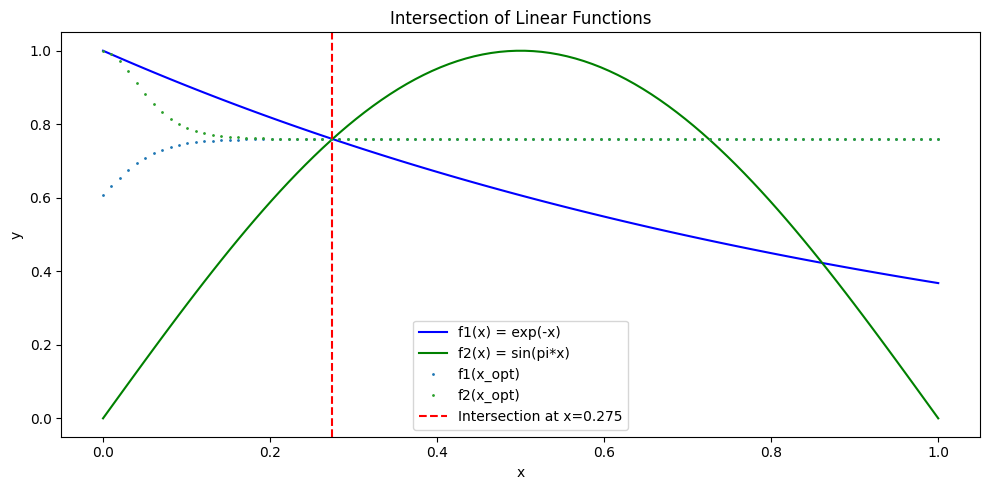

In [47]:
# Create an array of x values for plotting and testing
x_values = np.linspace(0, 1, 100)

# Compute the corresponding f1 and f2 values for both examples
f1_exp_values = f1_exp(x_values)
f2_sin_values = f2_sin(x_values)

# Example usage: Initialize at x0 = 0.5
x0 = 0.5
f1_x0 = f1_exp(x0)
f2_x0 = f2_sin(x0)

# Create the finder instance
finder = OnlineIntersectionFinder(x0, f1_x0, f2_x0)

# Iterate to refine the intersection and store x_opt values
x_opt_values = [x0]
for i in range(1, len(x_values)):
    # Probing step for the next x_opt
    x_opt = finder.update(
        f1_exp(x_opt_values[-1]), f2_sin(x_opt_values[-1])
    )  # Pass current function evaluations
    x_opt_values.append(x_opt)
    print(f"Iteration {i}: x_opt = {x_opt}")


# Define the function for finding the root (f1(x) - f2(x) = 0)
def difference(x):
    return f1_exp(x) - f2_sin(x)


x_opt_actual = fsolve(difference, 0.5)[0]
print(f"Actual x_opt: {x_opt_actual}")

# Plotting Example 1 (Linear Functions)
plt.figure(figsize=(10, 5))
plt.plot(x_values, f1_exp_values, label="f1(x) = exp(-x)", color="blue")
plt.plot(x_values, f2_sin_values, label="f2(x) = sin(pi*x)", color="green")
plt.title("Intersection of Linear Functions")
plt.xlabel("x")
plt.ylabel("y")

f1_opt_values = f1_exp(np.array(x_opt_values))
f2_opt_values = f2_sin(np.array(x_opt_values))


# Plot x_opt values as red dots
plt.plot(
    x_values, f1_opt_values, "o", label="f1(x_opt)", color="#1f77b4", markersize=1
)  # Darker blue
plt.plot(
    x_values, f2_opt_values, "o", label="f2(x_opt)", color="#2ca02c", markersize=1
)  # Darker green

# Mark the actual intersection point
plt.axvline(
    x_opt_actual,
    color="red",
    linestyle="--",
    label=f"Intersection at x={x_opt_actual:.3f}",
)
plt.legend()

plt.tight_layout()
plt.show()

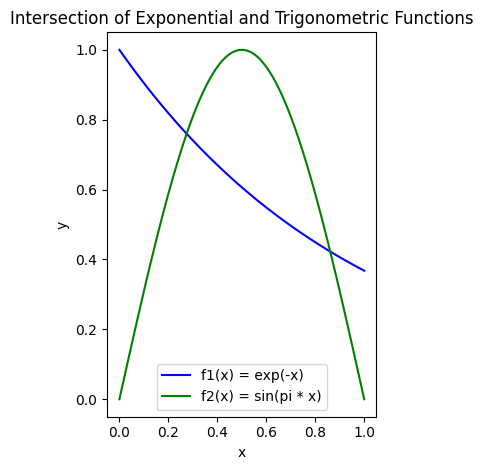

In [48]:
# Create an array of x values for plotting and testing
x_values = np.linspace(0, 1, 100)

f1_exp_values = f1_exp(x_values)
f2_sin_values = f2_sin(x_values)

# Plotting Example 2 (Non-Linear Functions)
plt.subplot(1, 2, 2)
plt.plot(x_values, f1_exp_values, label="f1(x) = exp(-x)", color="blue")
plt.plot(x_values, f2_sin_values, label="f2(x) = sin(pi * x)", color="green")
plt.title("Intersection of Exponential and Trigonometric Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# bwe = 80000
# d2c_split = 0.1

# # increase d2c_split by 0.04 from 0.1 to 0.96
# d2c_splits = np.arange(d2c_split, 1.0, 0.04)
# print(d2c_splits)

# with open("bitrate_allocation.txt", "w") as f:
#     for d2c_split in d2c_splits:
#         dbwe = int(bwe * d2c_split)
#         cbwe = bwe - dbwe
#         f.write(f"{cbwe} {dbwe}\n")